# Digit Recognition 
## Convolutional Neural Network implementation using TensorFlow - Keras
- Venkata A. Bharat Pothavajhala

In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [2]:
import tensorflow.keras as keras
print('TensorFlow version:',tf.__version__)
print('Keras version:',keras.__version__)

TensorFlow version: 2.4.0
Keras version: 2.4.0


In [3]:
mnist = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline


In [26]:
(train_X, train_Y), (test_X, test_Y) = mnist

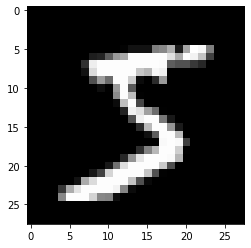

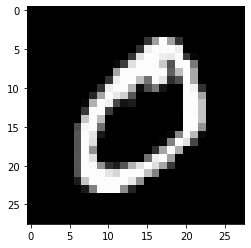

In [29]:
for i in range(2):
    plt.imshow(train_X[i])
    plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [7]:
model = Sequential()
inputShape = (28,28,1)
# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, kernel_size=(6,6),strides=(1,1),activation='relu',input_shape = inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(6,6),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32, kernel_size=(3,3),strides=(1,1),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [8]:
# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 32)        1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

In [9]:
train_X.shape
train_X = train_X.reshape(-1,28,28,1)
train_X.shape

(60000, 28, 28, 1)

In [10]:
#import numpy as np
y = tf.keras.utils.to_categorical(train_Y, num_classes=10)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
# Train the model over 5 epochs using 30-image batches and using the validation holdout dataset for validation
num_epochs = 5
batch_size = 30
history = model.fit(train_X,y,batch_size=batch_size,epochs = num_epochs)

Epoch 1/5
2000/2000 [==============================] - 43s 21ms/step - loss: 1.7607 - accuracy: 0.8177
Epoch 2/5
2000/2000 [==============================] - 43s 21ms/step - loss: 0.1073 - accuracy: 0.9689
Epoch 3/5
2000/2000 [==============================] - 42s 21ms/step - loss: 0.0813 - accuracy: 0.9756
Epoch 4/5
2000/2000 [==============================] - 43s 21ms/step - loss: 0.0771 - accuracy: 0.9770
Epoch 5/5
2000/2000 [==============================] - 43s 21ms/step - loss: 0.0658 - accuracy: 0.9813


In [12]:
model.save('nn_tfTrained.mdl')

INFO:tensorflow:Assets written to: nn_tfTrained.mdl/assets


In [17]:
#from google.colab import files

# with open('nn_tfTrained.mdl', 'w') as f:
#   f.write('some content')

files.download('/content/nn_tfTrained.mdl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
testY = tf.keras.utils.to_categorical(test_Y,num_classes = 10)

In [ ]:
test_X[1].shape[1]

28

In [ ]:
from tensorflow.keras import models
import numpy as np
from random import randint
import os
%matplotlib inline


In [ ]:
classnames = list(range(10))
classnames

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

index is  4
class is  4


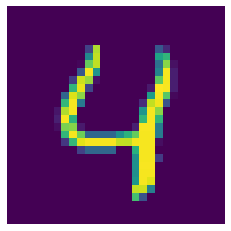

In [ ]:
# Function to predict the class of an image
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], 1)

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    #imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index

# Create a random test image
img = test_X[4]
plt.axis('off')
plt.imshow(img)

# Use the classifier to predict the class
model1 = models.load_model('nn_tfTrained.mdl') # loads the saved model
class_idx = predict_image(model1, img)
print('index is ',class_idx)
print ('class is ',classnames[class_idx])